In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabets_data = pd.read_csv('../data/diabetes.csv')
diabets_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabets_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabets_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabets_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


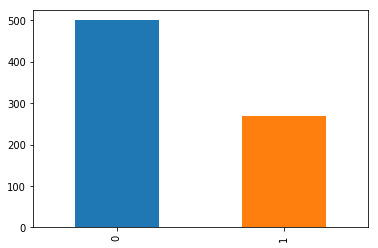

In [6]:
print(diabets_data.Outcome.value_counts())
p=diabets_data.Outcome.value_counts().plot(kind='bar')
plt.show()

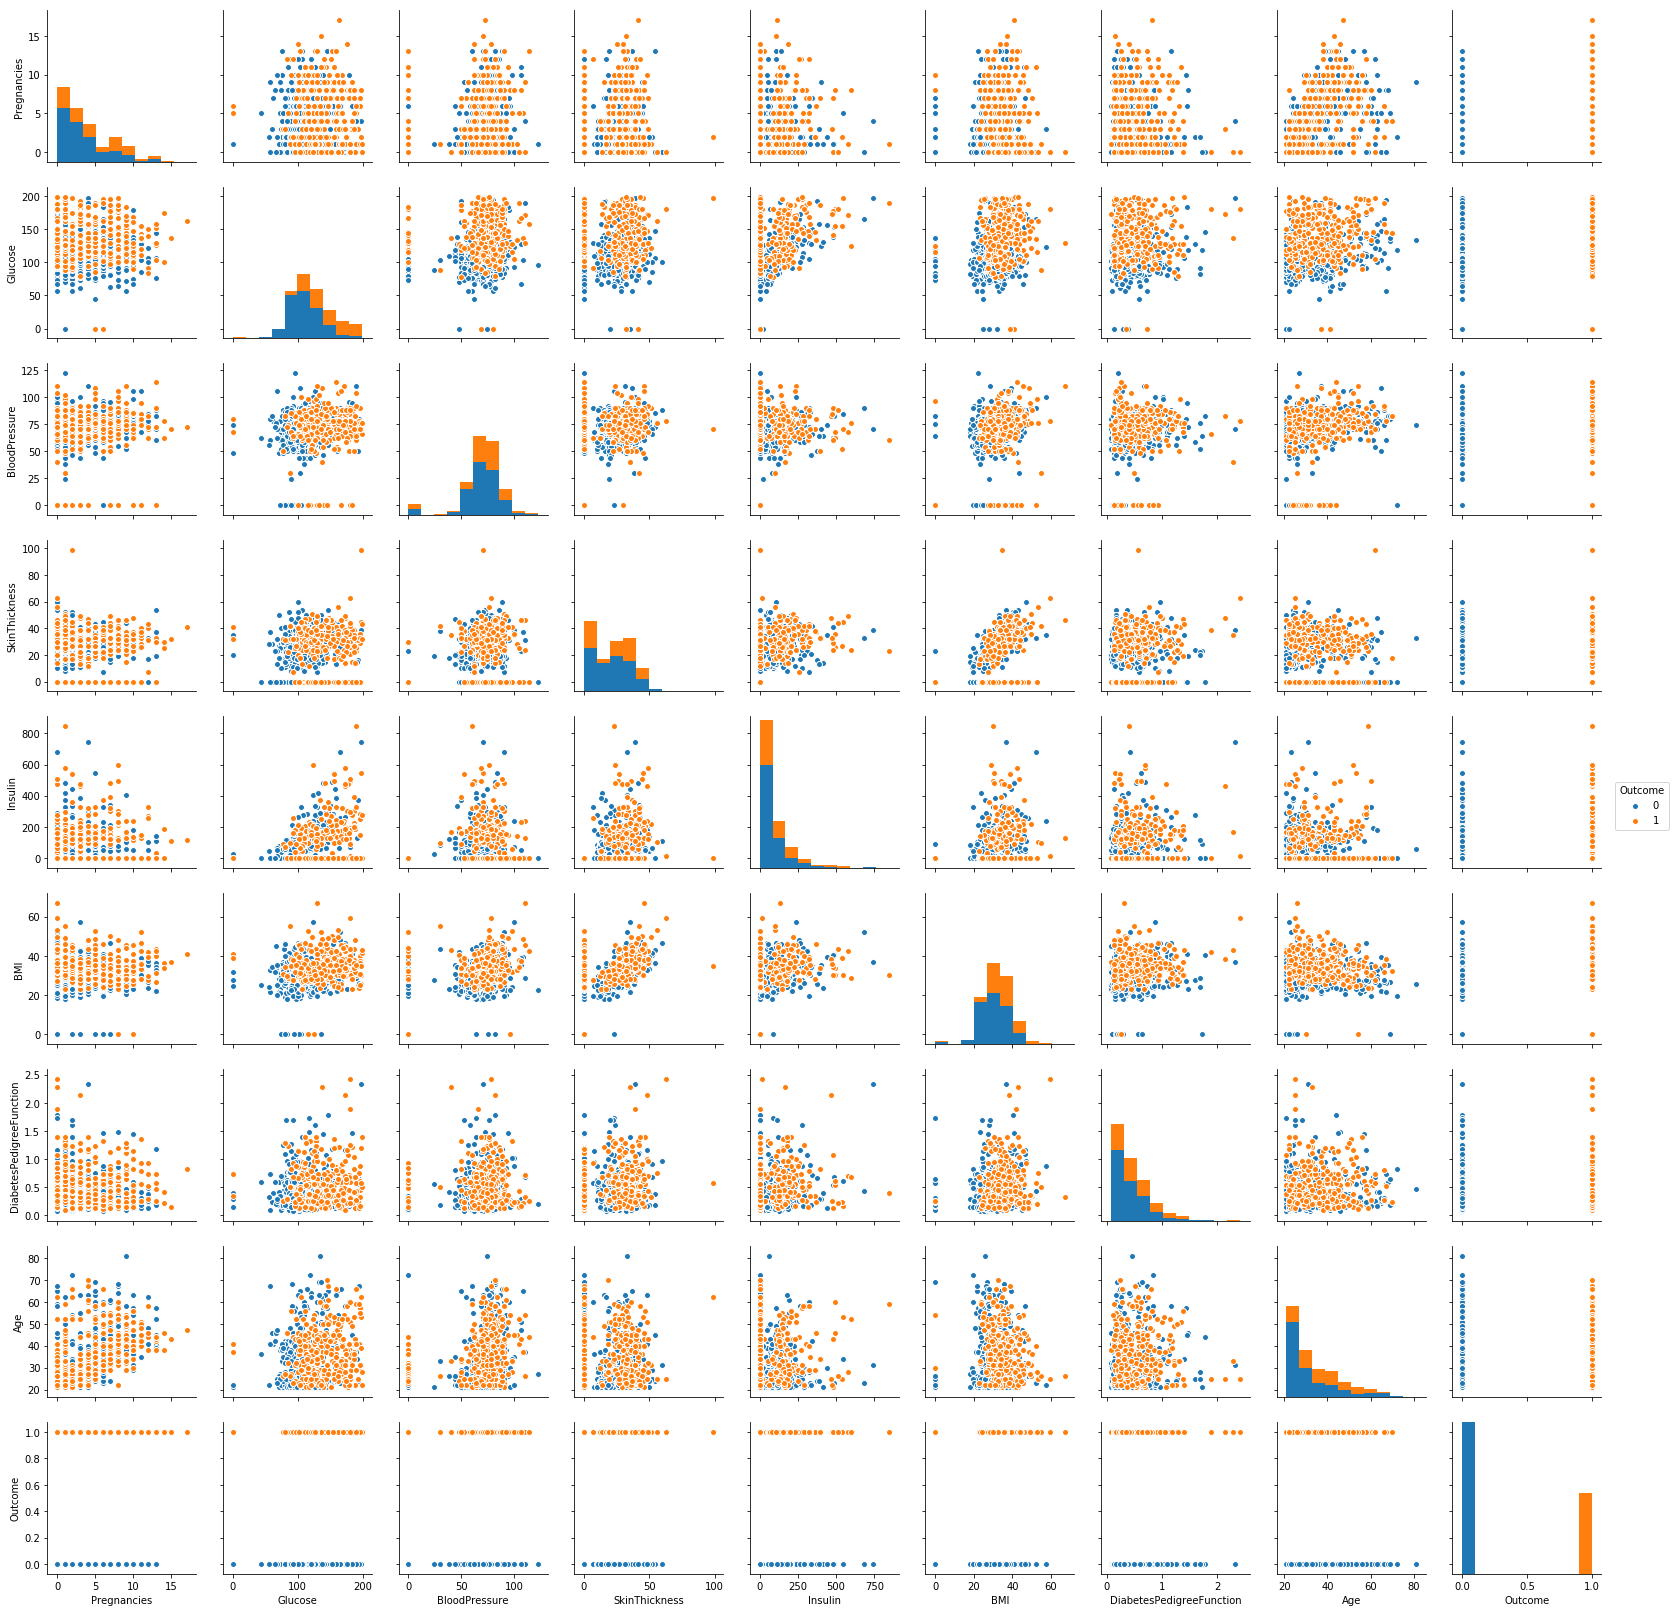

In [7]:
p=sns.pairplot(diabets_data,hue='Outcome')
plt.show()

In [8]:
colume = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabets_data[colume]=diabets_data[colume].replace(0,np.nan)

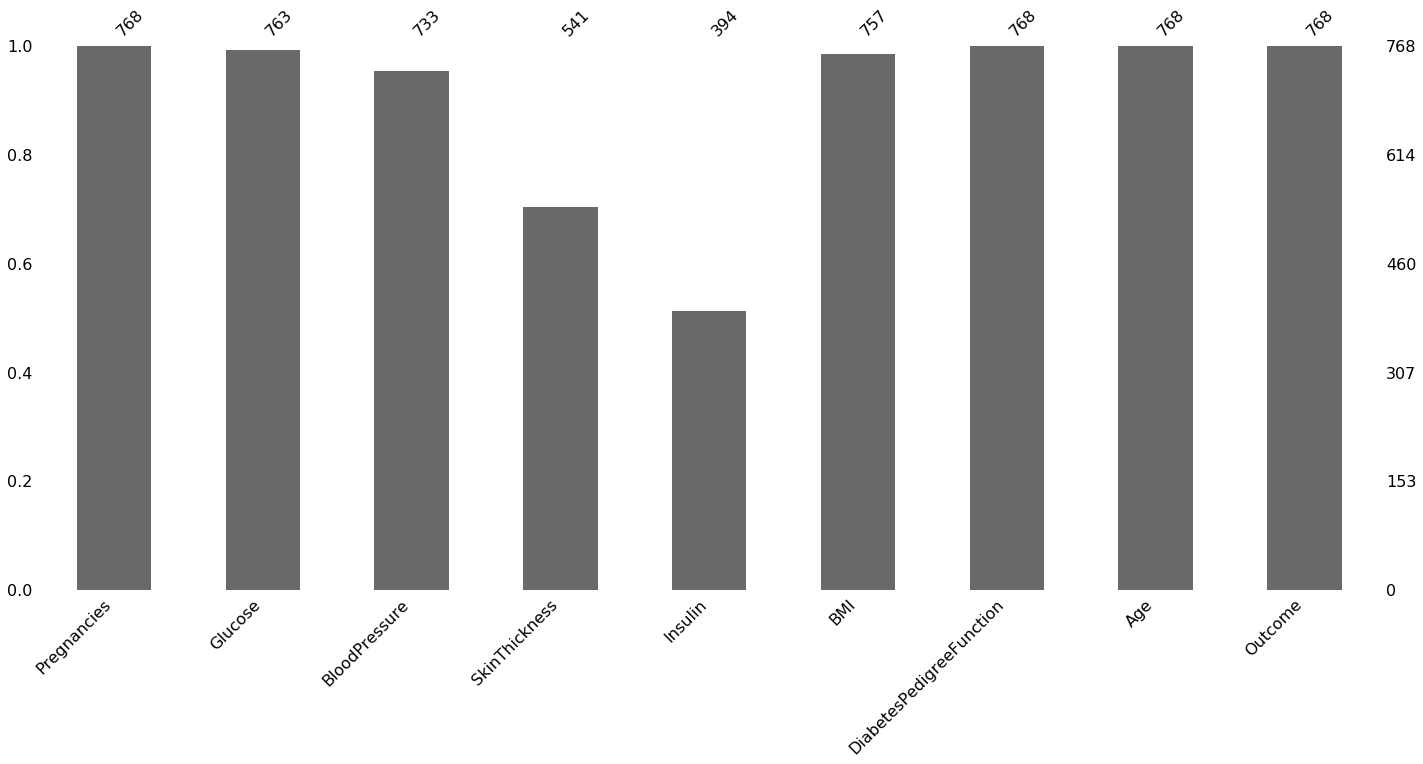

In [9]:
import missingno as msno
p=msno.bar(diabets_data)
plt.show()

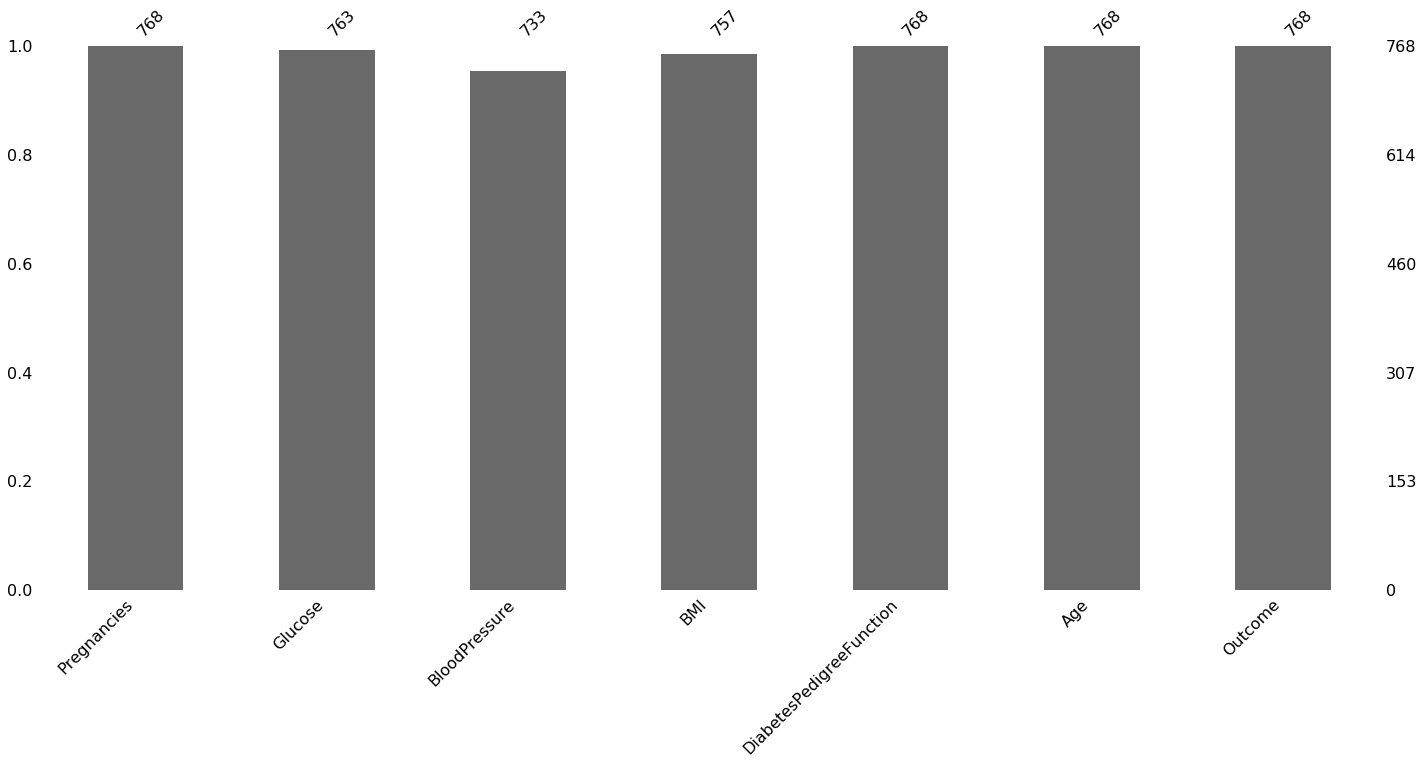

In [10]:
thresh_count = diabets_data.shape[0]*0.8
diabets_data = diabets_data.dropna(thresh=thresh_count,axis=1)
p=msno.bar(diabets_data)
plt.show()

In [13]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
colume = ['Glucose','BloodPressure','BMI']
diabets_data[colume]=imr.fit_transform(diabets_data[colume])

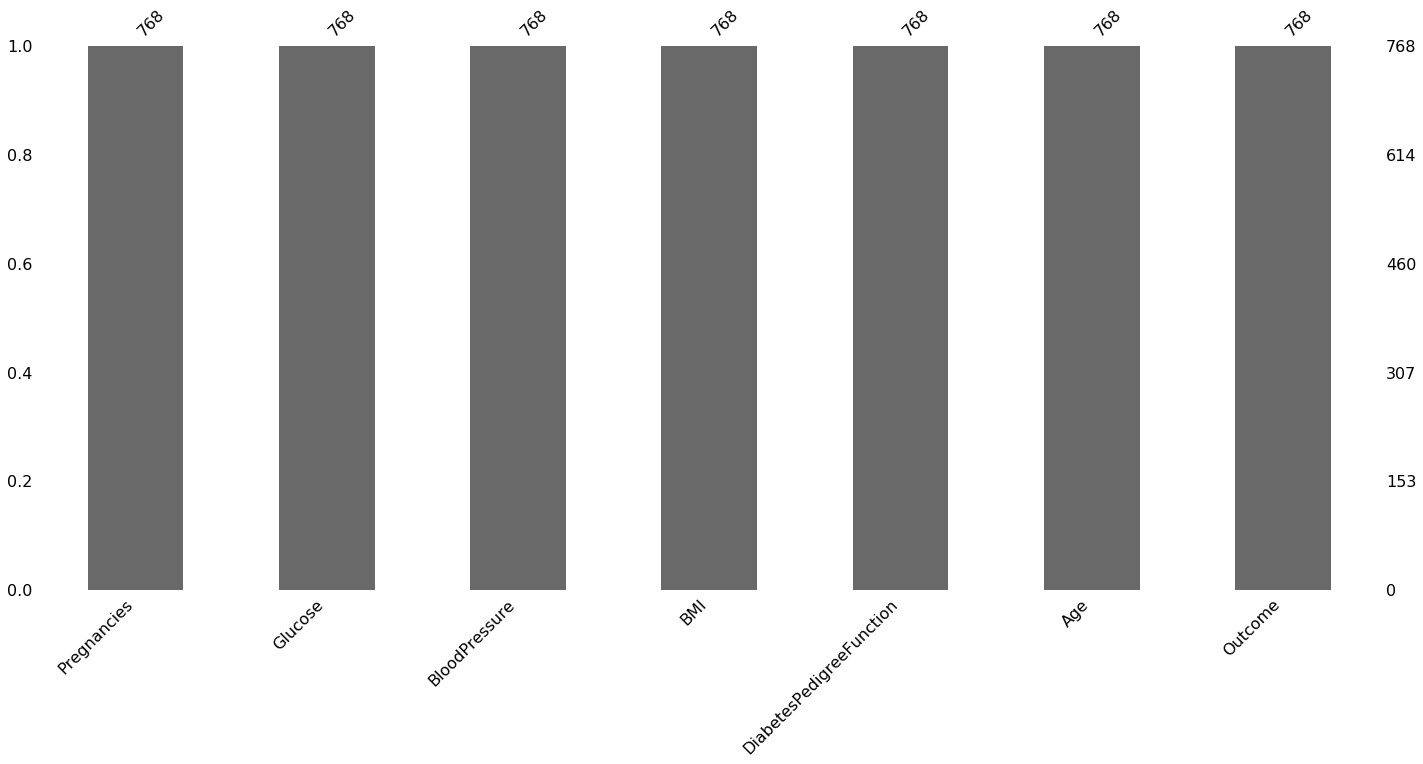

In [14]:
p=msno.bar(diabets_data)
plt.show()

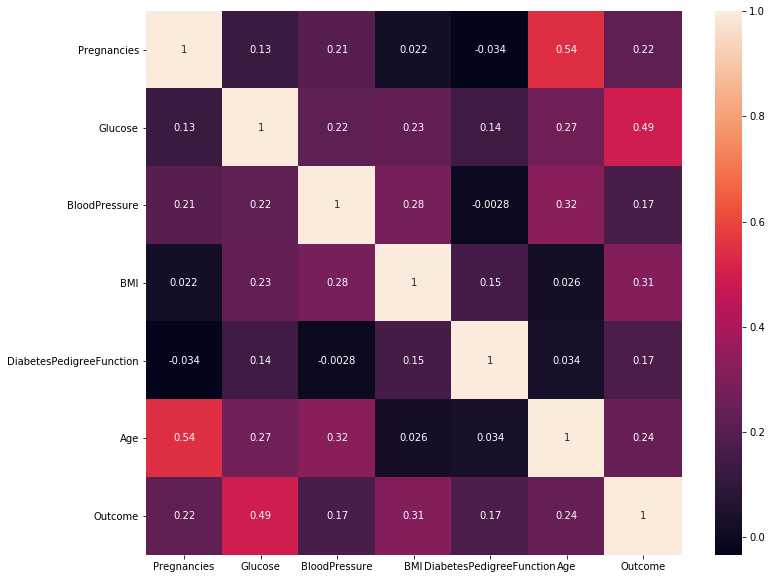

In [15]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabets_data.corr(),annot=True)
plt.show()

In [16]:
x=diabets_data.drop('Outcome',axis=1)
y=diabets_data.Outcome

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR=LogisticRegression()
LR.fit(x_train,y_train)
predictions = LR.predict(x_test)
print(classification_report(y_test,predictions))

C:\Users\张帅\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.75      0.51      0.60        81

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.75       231

